# Modèle final

On peut désormais passer au modèle final:

## Construction des 2 modèles:

In [96]:
import modele1
import modele2
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from finalPlot import plotFinal

test_well_pred1,accuracy = modele1.modele1()
test_well_pred2 = modele2.modele2()
Modele_final = pd.DataFrame()
Modele_final[['Facies','Old_Prediction']] = test_well_pred1[['Facies','Prediction']]
Modele_final['New_Prediction'] = test_well_pred1['Prediction']
Modele_final[['Change_Layer','Change_Layer_Predicted']] = test_well_pred2[['ChangeLayer','Prediction']]
Modele_final['Entropy'] = 1
Modele_final['Depth'] = test_well_pred1['Depth']


Epoch 1/80
9/9 [==============================] - 1s 3ms/step - loss: 2.1900 - accuracy: 0.1914
Epoch 2/80
9/9 [==============================] - 0s 4ms/step - loss: 2.1668 - accuracy: 0.2947
Epoch 3/80
9/9 [==============================] - 0s 4ms/step - loss: 2.1402 - accuracy: 0.3114
Epoch 4/80
9/9 [==============================] - 0s 4ms/step - loss: 2.1064 - accuracy: 0.3227
Epoch 5/80
9/9 [==============================] - 0s 4ms/step - loss: 2.0683 - accuracy: 0.3220
Epoch 6/80
9/9 [==============================] - 0s 4ms/step - loss: 2.0252 - accuracy: 0.3341
Epoch 7/80
9/9 [==============================] - 0s 4ms/step - loss: 1.9719 - accuracy: 0.3326
Epoch 8/80
9/9 [==============================] - 0s 4ms/step - loss: 1.9171 - accuracy: 0.3375
Epoch 9/80
9/9 [==============================] - 0s 3ms/step - loss: 1.8676 - accuracy: 0.3553
Epoch 10/80
9/9 [==============================] - 0s 3ms/step - loss: 1.8227 - accuracy: 0.3594
Epoch 11/80
9/9 [======================

/home/leo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leo/Documents/MOM/Projet/modele2.py:28: 

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       402
           1       0.17      0.34      0.23        47

    accuracy                           0.76       449
   macro avg       0.54      0.57      0.54       449
weighted avg       0.84      0.76      0.79       449



/home/leo/Documents/MOM/Projet/modele2.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mean_"+attribut][0] = data[attribut][3]
/home/leo/Documents/MOM/Projet/modele2.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mean_"+attribut][1] = data[attribut][3]
/home/leo/Documents/MOM/Projet/modele2.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mean_"+attribut][2] = data[attribut][3]
/home/leo/Documents/MOM/P

## Mise en commun:

In [97]:
i= test_well_pred1.index[0]
entropy = []
while i <= test_well_pred1.index[-1]:
    debut = i
    cur_dict = {}
    while test_well_pred2['Prediction'][i] != 1 and i < test_well_pred1.index[-1]:
        if test_well_pred1['Prediction'][i] in cur_dict: 
            cur_dict[test_well_pred1['Prediction'][i]] +=1
        else:
            cur_dict[test_well_pred1['Prediction'][i]] =1
        i+=1
    if test_well_pred1['Prediction'][i] in cur_dict: 
        cur_dict[test_well_pred1['Prediction'][i]] +=1
    else:
        cur_dict[test_well_pred1['Prediction'][i]] =1
    max_facies = max(cur_dict,key=cur_dict.get)
    if debut-i != 0: 
        Modele_final.loc[debut:i,'Entropy'] = cur_dict[max_facies]/sum(cur_dict.values())
    Modele_final.loc[debut:i,'New_Prediction'] = max_facies
    i+=1


En même temps on construit l'entropie pour l'ajouter sur le graphique de fin.

## Résultat :

In [98]:

# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
test_well_pred1.loc[:,'FaciesLabels'] = test_well_pred1.apply(lambda row: label_facies(row, facies_labels), axis=1)


In [99]:
y_test = Modele_final['Facies']
y_pred = Modele_final['New_Prediction']
from sklearn.metrics import classification_report
try:
    target_names = ['SS','CSiS', 'FSiS', 'SiSh','MS', 'WS', 'D','PS','BS']

    print(classification_report(y_test, y_pred,target_names=target_names))
    print("modele1 accuracy : ", accuracy)
except:
    target_names = ['SS','CSiS', 'FSiS', 'SiSh','MS', 'WS', 'D','PS']

    print(classification_report(y_test, y_pred,target_names=target_names))
    print("modele1 accuracy : ", accuracy)

[2 1 3 8 6 4 7 5]
[2 1 3 8 6 4 7 5]
              precision    recall  f1-score   support

          SS       0.79      0.58      0.67        89
        CSiS       0.62      0.79      0.69        89
        FSiS       0.83      0.71      0.76       117
        SiSh       0.33      0.14      0.20         7
          MS       0.00      0.00      0.00        19
          WS       0.47      0.82      0.60        71
           D       1.00      0.29      0.45        17
          PS       0.54      0.53      0.53        40

    accuracy                           0.65       449
   macro avg       0.57      0.48      0.49       449
weighted avg       0.66      0.65      0.63       449

modele1 accuracy :  0.5812917594654788


/home/leo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarque:

Comme le modèle 1 est instable le modèle final l'est aussi il peut aller de 55% à 69%

## Graphique:

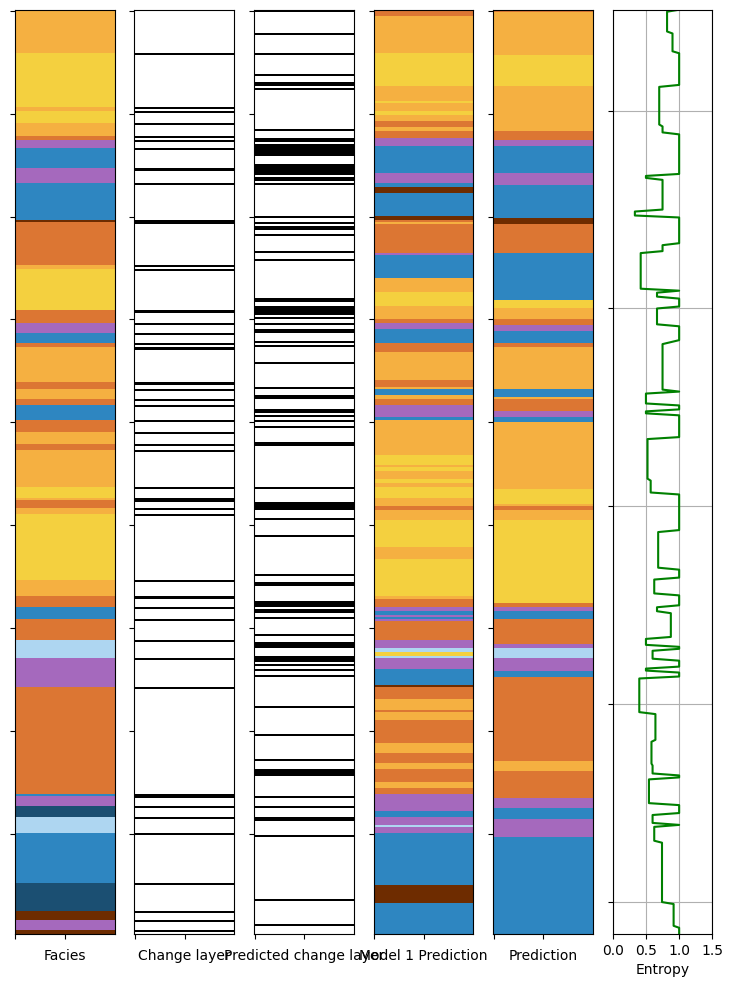

In [100]:

plotFinal(Modele_final,facies_colors)
plt.show()

## Conclusion

Le modèle 2 améliore en moyenne de 3% à 5% le modèle 1. Dans de rare cas le modèle 2 empire le modèle 1 de 1%. On peut donc conclure que notre idée améliore bien le réseau de neurone. Cependant ce modèle est largement améliorable.

### Exemple d'un modèle à 69 % :

![69 % précision](resultat/69%25%2C%20Neurone%20et%20arbre%20de%20decision.png)

###  Piste d'améliorations:

- On a fait énormement de test pour le modèle 2 mais on a pas réussi à faire mieux que juste l'arbre de décision qui n'est pas très précis. En théorie le max que le modèle 2 puisse avoir est 84% de précision.
- Changer les paramètres du modèle 1 pour le rendre plus stable ou plus précis.